In [9]:
# Dependencies and Setupz
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries=[]
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=3000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=3000)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination, also grab and record the country codes
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country=citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
print(len(cities))

1019


In [11]:
#Load Data into an array of Json files
data=[]
counter=1
for i in range (len(cities)):
    #Call for the files, make sure to add the coutnry code as well to ensure enough cities are identified
    data.append(requests.get("http://api.openweathermap.org/data/2.5/weather?q="+cities[i]+','+countries[i]+"&units=imperial"+"&appid="+api_key).json())
    print(cities[i]+" : "+str(counter))
    counter+=1


turbat : 1
guadalupe y calvo : 2
saskylakh : 3
palmer : 4
berezovyy : 5
avera : 6
slave lake : 7
nanakuli : 8
poya : 9
taolanaro : 10
longyearbyen : 11
new norfolk : 12
saint-philippe : 13
cape town : 14
upernavik : 15
manoel urbano : 16
tumannyy : 17
paamiut : 18
lompoc : 19
yellowknife : 20
rikitea : 21
provideniya : 22
zonguldak : 23
champerico : 24
felidhoo : 25
avarua : 26
kampot : 27
vuktyl : 28
hutchinson : 29
clonakilty : 30
chokurdakh : 31
abu dhabi : 32
kirakira : 33
qaanaaq : 34
papenburg : 35
hermanus : 36
tazovskiy : 37
bon accord : 38
busselton : 39
albany : 40
east london : 41
derzhavinsk : 42
kieta : 43
havelock : 44
ushuaia : 45
ugoofaaru : 46
lorengau : 47
butaritari : 48
man : 49
san juan : 50
alofi : 51
severo-kurilsk : 52
ribeira grande : 53
timmins : 54
hobart : 55
kapaa : 56
nanortalik : 57
shingu : 58
jamestown : 59
shiraz : 60
acapulco : 61
birjand : 62
port alfred : 63
portland : 64
los llanos de aridane : 65
faanui : 66
seoul : 67
salalah : 68
chuy : 69
xuddu

sinjah : 544
newport : 545
kadaya : 546
batticaloa : 547
omboue : 548
skalistyy : 549
lumasal : 550
mareeba : 551
muncar : 552
mrirt : 553
shimoda : 554
bor : 555
cabedelo : 556
beroroha : 557
sheltozero : 558
rawannawi : 559
karasburg : 560
kahului : 561
lasa : 562
lubao : 563
caraquet : 564
novaya igirma : 565
liepaja : 566
potma : 567
verkhnevilyuysk : 568
danilov : 569
nadym : 570
gao : 571
broken hill : 572
port-de-bouc : 573
wewak : 574
naze : 575
windsor : 576
bathsheba : 577
carballo : 578
san blas : 579
kenai : 580
roebourne : 581
garowe : 582
merritt island : 583
sao joao da barra : 584
lodja : 585
oranjestad : 586
vacha : 587
lao cai : 588
xghajra : 589
olafsvik : 590
port hedland : 591
mut : 592
pinhao : 593
garango : 594
quelimane : 595
goshen : 596
bobo dioulasso : 597
sao paulo de olivenca : 598
nueve de julio : 599
kuala terengganu : 600
thunder bay : 601
zhangye : 602
hondo : 603
armacao dos buzios : 604
katsuura : 605
khokholskiy : 606
tres arroyos : 607
omaruru : 608

In [12]:
#Load the data into a starting data frame
df=pd.DataFrame(data)
#Drop unncecessary tables from api call
df=df.drop(['rain','message','visibility','cod','timezone','base'],axis=1)
#Drop any city results that were not found
df=df.dropna()
df

,coord,weather,main,wind,clouds,dt,sys,id,name
0,"{'lon': 63.05, 'lat': 26}","[{'id': 804, 'main': 'Clouds', 'description': ...","{'temp': 85.55, 'pressure': 1005.51, 'humidity...","{'speed': 8.66, 'deg': 135.01}",{'all': 85},1.567106e+09,"{'message': 0.0064, 'country': 'PK', 'sunrise'...",1163054.0,Turbat
1,"{'lon': -106.96, 'lat': 26.09}","[{'id': 803, 'main': 'Clouds', 'description': ...","{'temp': 77.09, 'pressure': 1016.11, 'humidity...","{'speed': 5.57, 'deg': 266.916}",{'all': 53},1.567106e+09,"{'message': 0.0099, 'country': 'MX', 'sunrise'...",4005370.0,Guadalupe y Calvo
2,"{'lon': 114.09, 'lat': 71.97}","[{'id': 803, 'main': 'Clouds', 'description': ...","{'temp': 37.49, 'pressure': 1016.34, 'humidity...","{'speed': 4.12, 'deg': 79.806}",{'all': 71},1.567106e+09,"{'message': 0.0083, 'country': 'RU', 'sunrise'...",2017155.0,Saskylakh
3,"{'lon': -149.11, 'lat': 61.6}","[{'id': 711, 'main': 'Smoke', 'description': '...","{'temp': 56.34, 'pressure': 1022, 'humidity': ...","{'speed': 4.7, 'deg': 300}",{'all': 75},1.567106e+09,"{'type': 1, 'id': 7756, 'message': 0.0114, 'co...",5871146.0,Palmer
4,"{'lon': 135.7, 'lat': 51.67}","[{'id': 500, 'main': 'Rain', 'description': 'l...","{'temp': 53.33, 'pressure': 1007.79, 'humidity...","{'speed': 3.49, 'deg': 348.986}",{'all': 100},1.567105e+09,"{'message': 0.0059, 'country': 'RU', 'sunrise'...",2026786.0,Berezovyy
...,...,...,...,...,...,...,...,...,...
1012,"{'lon': -107.63, 'lat': 27.75}","[{'id': 803, 'main': 'Clouds', 'description': ...","{'temp': 79.61, 'pressure': 1016.19, 'humidity...","{'speed': 2.84, 'deg': 251.922}",{'all': 82},1.567106e+09,"{'message': 0.0062, 'country': 'MX', 'sunrise'...",4012593.0,Creel
1014,"{'lon': -97.06, 'lat': 36.12}","[{'id': 801, 'main': 'Clouds', 'description': ...","{'temp': 90.23, 'pressure': 1016, 'humidity': ...","{'speed': 12.75, 'deg': 190, 'gust': 17.22}",{'all': 20},1.567106e+09,"{'type': 1, 'id': 5949, 'message': 0.007, 'cou...",4552215.0,Stillwater
1015,"{'lon': -149.44, 'lat': 61.58}","[{'id': 711, 'main': 'Smoke', 'description': '...","{'temp': 56.1, 'pressure': 1022, 'humidity': 5...","{'speed': 3.29, 'deg': 289.31}",{'all': 1},1.567106e+09,"{'type': 1, 'id': 7637, 'message': 0.0089, 'co...",5877641.0,Wasilla
1016,"{'lon': -97.01, 'lat': 32.87}","[{'id': 800, 'main': 'Clear', 'description': '...","{'temp': 95.58, 'pressure': 1017, 'humidity': ...","{'speed': 11.41, 'deg': 170}",{'all': 5},1.567106e+09,"{'type': 1, 'id': 4249, 'message': 0.0096, 'co...",4671240.0,Estelle


In [13]:
#Go into the dataframe and extract the collumns that will be used in the final dataframe
country=[]
for thing in df['sys']:
    country.append((thing['country']))
temp=[]
humidity=[]
for thing in df['main']:
    temp.append(thing['temp_max'])
    humidity.append(thing['humidity'])
lat=[]
lng=[]
for thing in df['coord']:
    lat.append(thing['lat'])
    lng.append(thing['lon'])

wind=[]
for thing in df['wind']:
    wind.append(thing['speed'])
clouds=[]
for thing in df['clouds']:
    clouds.append(thing['all'])


In [14]:
#Construct a new dataframe with the columns we extraced from the previous data frame
finalDF=pd.DataFrame()
finalDF['City']=df['name']
finalDF['Cloudiness %']=clouds
finalDF['Coutry']=country
finalDF['Date']=df['dt']
finalDF['Humidity %']=humidity
finalDF['Latitude']=lat
finalDF['Long']=lng
finalDF['Temperature (F)']=temp
finalDF['Wind Speed (mph)']=wind
finalDF.to_csv("Data.csv")

In [21]:
#Save Dataframe to CSV
finalDF.to_csv("~/Data.csv")

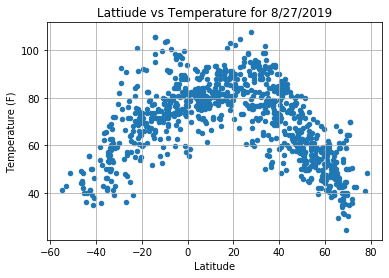

In [25]:
#Creating the Temp plot
temperature=finalDF.plot.scatter(x="Latitude",y="Temperature (F)",title="Lattiude vs Temperature for 8/27/2019",grid=True)
plt.savefig("Temp.png")

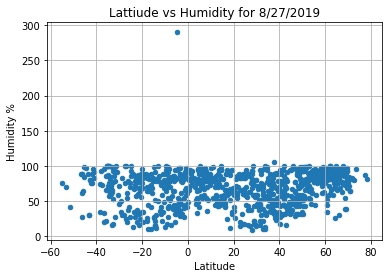

In [26]:
humidity=finalDF.plot.scatter(x="Latitude",y='Humidity %', title="Lattiude vs Humidity for 8/27/2019",grid=True)
plt.savefig("Humidity.png")

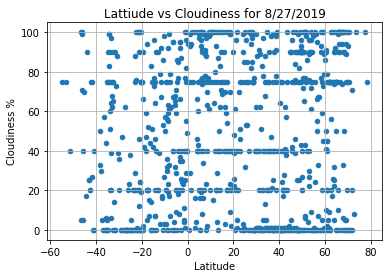

In [27]:
cloudiness=finalDF.plot.scatter(x="Latitude",y='Cloudiness %', title="Lattiude vs Cloudiness for 8/27/2019",grid=True)
plt.savefig("Cloudcover.png")

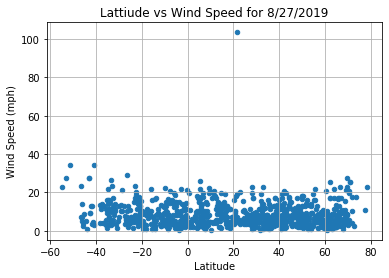

In [28]:
windiness=finalDF.plot.scatter(x="Latitude",y='Wind Speed (mph)', title="Lattiude vs Wind Speed for 8/27/2019",grid=True)
plt.savefig("WindSpeed.png")

In [29]:
#There are a few interesting things that we can divine from these graphs
#  1: It seems that There is a clear decrease in temperature as one gets farther away from the equator. This is obvious,
#But we can clearly tell from the shape of the graph that there is a correlation.
#
#  2:It seems that there are not any data points that are below 60 degrees Lattitude on the globe. Seeing as all these parts of 
#The map are the ocean surrounding antartica, or antarctica itself, there are no cities to measure temperature from. Although
# we can guess that the temperature is going to be similair to the arctic, we can't know for sure from this data.
#I am somewhat curious if we used latitude and longitude instead for the graph, if we would find a few remote weather stations
#That could fill out this part of the map.
# 
#  3:Cloudiness seems to be measured hapharardly, clustering around intervals of even numbers, 20%, 40%, 75%, among others. It
# Seems unlikely to me that these measurements are truly accurate, and are more arbitrary guesses by weather station workers,
# And should be taken with a grain of salt.

# 4: This is more of a bonus obvservation, but in both the wind speed, and the humidity, there is one major outlier. I was curious
# as to what it was, and upon inspection I believe it to be a result of the Hurricane Dorian raining on a carribean island. 
# If I were to display this data professionally, I would likely take this extreme outlier out, but as it stands I think its an
# interesting point on the graph.